# Stock Prices Prediction

Before we analyze stock data, we need to get it into some workable format. Stock data can be obtained from Yahoo! Finance, Google Finance, or a number of other sources. These days I recommend getting data from ((Quandl)), a provider of community-maintained financial and economic data - I will be using two packages, quandl and pandas_datareader we will runing in command prompt:

- conda install quandl
- conda install pandas-datareader

### Load Data

In [1]:
import pandas as pd
import quandl
import datetime
import matplotlib.pyplot as plt
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas_datareader.data as web

In [3]:
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()

# Let's get Apple stock data; Apple's ticker symbol is AAPL
s = "AAPL"
apple = quandl.get("WIKI/" + s, start_date=start, end_date=end)

type(apple)

pandas.core.frame.DataFrame

In [4]:
apple.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-01-04,102.61,105.368,102.00,105.35,67649387.0,0.0,1.0,99.136516,101.801154,98.547165,101.783763,67649387.0
2016-01-05,105.75,105.850,102.41,102.71,55790992.0,0.0,1.0,102.170223,102.266838,98.943286,99.233131,55790992.0
2016-01-06,100.56,102.370,99.87,100.70,68457388.0,0.0,1.0,97.155911,98.904640,96.489269,97.291172,68457388.0
2016-01-07,98.68,100.130,96.43,96.45,81094428.0,0.0,1.0,95.339552,96.740467,93.165717,93.185040,81094428.0
2016-01-08,98.55,99.110,96.76,96.96,70798016.0,0.0,1.0,95.213952,95.754996,93.484546,93.677776,70798016.0


## Data Description

In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 560 entries, 2016-01-04 to 2018-03-27
Data columns (total 12 columns):
Open           560 non-null float64
High           560 non-null float64
Low            560 non-null float64
Close          560 non-null float64
Volume         560 non-null float64
Ex-Dividend    560 non-null float64
Split Ratio    560 non-null float64
Adj. Open      560 non-null float64
Adj. High      560 non-null float64
Adj. Low       560 non-null float64
Adj. Close     560 non-null float64
Adj. Volume    560 non-null float64
dtypes: float64(12)
memory usage: 56.9 KB


In [70]:
#apple.describe()

# Plot Data

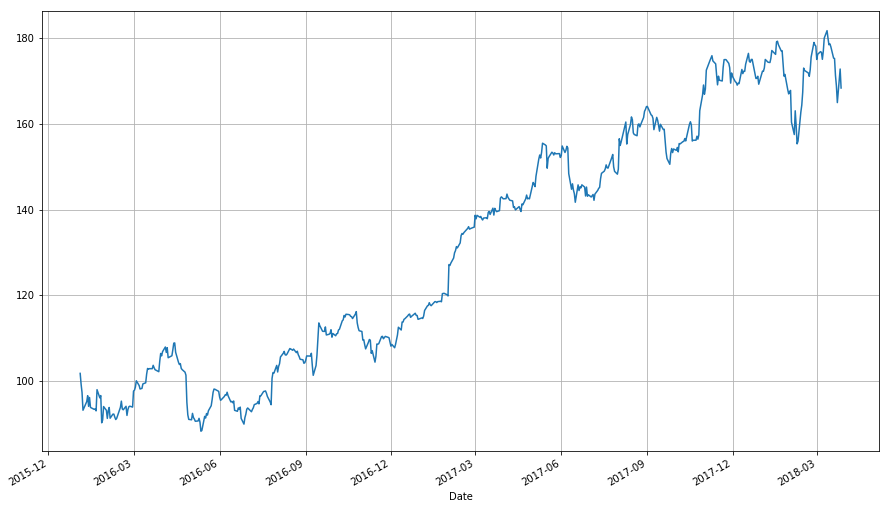

In [6]:
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots 
apple["Adj. Close"].plot(grid = True) # Plot the adjusted closing price of AAPL

# Candlestick

In [7]:
from matplotlib.dates import DateFormatter, WeekdayLocator,DayLocator, MONDAY
from mpl_finance import candlestick_ohlc

In [8]:
from MyCandleStick import pandas_candlestick_ohlc

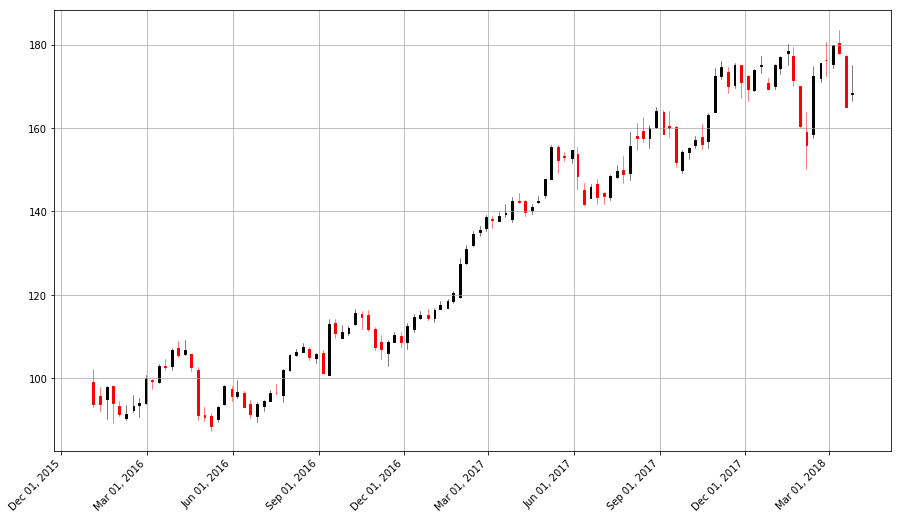

In [12]:
pandas_candlestick_ohlc(apple, adj=True, stick="week") 

# Moving Averages


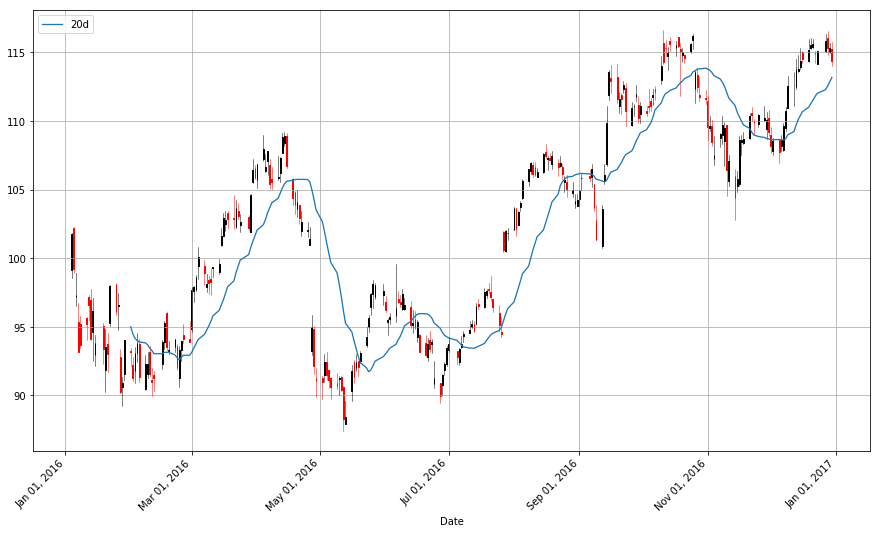

In [13]:
apple["20d"] = np.round(apple["Adj. Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-12-31',:], otherseries = "20d", adj=True)

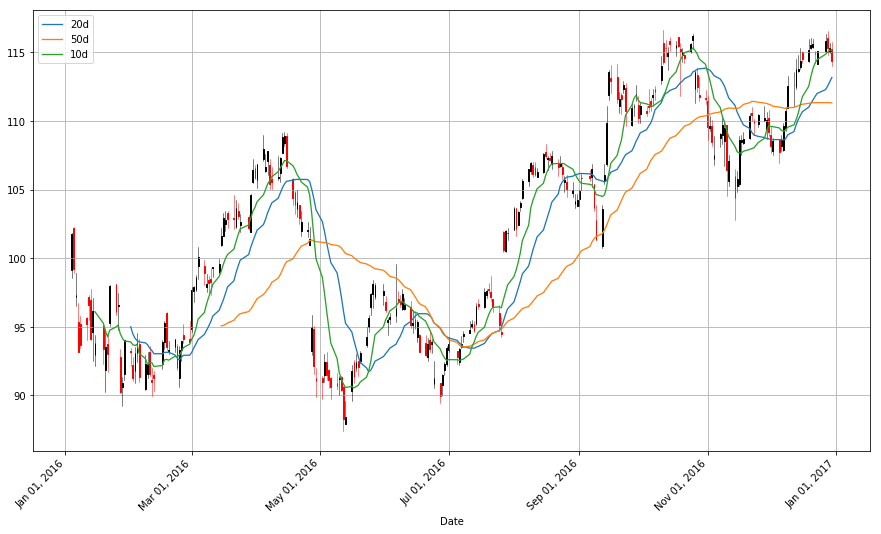

In [14]:
apple["50d"] = np.round(apple["Adj. Close"].rolling(window = 50, center = False).mean(), 2)
apple["10d"] = np.round(apple["Adj. Close"].rolling(window = 10, center = False).mean(), 2)

pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-12-31',:], otherseries = ["20d", "50d", "10d"], adj=True)

## Compare its performance with (SPY) - Load More Data

compare the performance of stocks to the performance of the overall market. SPY, which is the ticker symbol for the SPDR S&P 500 exchange-traded mutual fund (ETF) - SPY data is not available for free from Quandl, so I will get this data from Yahoo! Finance. (I don’t have a choice)

In [15]:
microsoft, google = (quandl.get("WIKI/" + s, start_date=start, end_date=end) for s in ["MSFT", "GOOG"])
 
# Below I create a DataFrame consisting of the adjusted closing price of these stocks
stocks = pd.DataFrame({"AAPL": apple["Adj. Close"],
                      "MSFT": microsoft["Adj. Close"],
                      "GOOG": google["Adj. Close"]})
 
stocks.head()

,AAPL,MSFT,GOOG
Date,,,
2016-01-04,101.783763,52.181598,741.84
2016-01-05,99.233131,52.419653,742.58
2016-01-06,97.291172,51.467434,743.62
2016-01-07,93.185040,49.677262,726.39
2016-01-08,93.677776,49.829617,714.47


In [16]:
spyderdat = web.DataReader("SPY", "yahoo", start, end) 

In [17]:
stockspy = stocks
stockspy = stockspy.join(spyderdat.loc[:, "Adj Close"]).rename(columns={"Adj Close": "SPY"})
stockspy.head()

,AAPL,MSFT,GOOG,SPY
Date,,,,
2016-01-04,101.783763,52.181598,741.84,190.548859
2016-01-05,99.233131,52.419653,742.58,190.871170
2016-01-06,97.291172,51.467434,743.62,188.463501
2016-01-07,93.185040,49.677262,726.39,183.941971
2016-01-08,93.677776,49.829617,714.47,181.922913


In [47]:
#stocks.plot(secondary_y = ["AAPL"], grid = True)
#stocks.plot(grid = True)

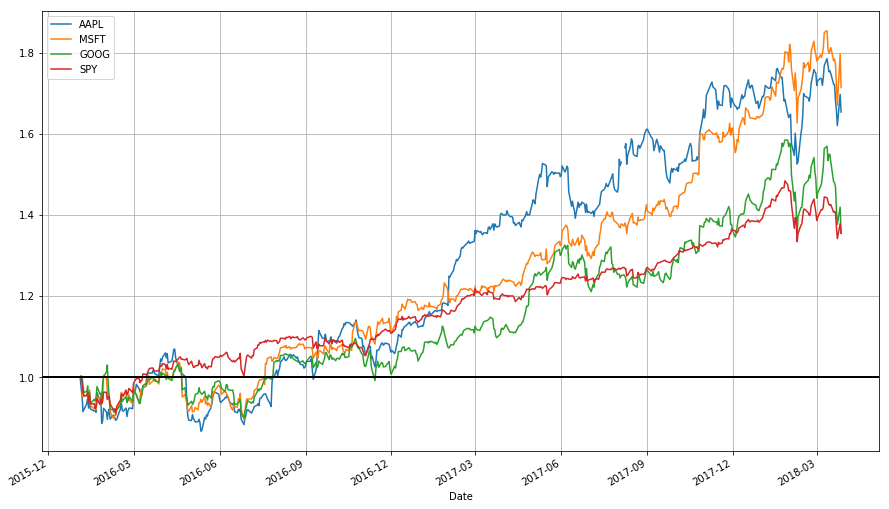

In [18]:
stock_return = stockspy.apply(lambda x: x / x[0]) # return stock scalling - probability
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

# Remove Trend and Non-Stationary

In [19]:
# Remove Trend and non-Stationary for all compaies 
import numpy as np
stock_change = stockspy.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,AAPL,MSFT,GOOG,SPY
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.025379,0.004552,0.000997,0.001690
2016-01-06,-0.019764,-0.018332,0.001400,-0.012694
2016-01-07,-0.043121,-0.035402,-0.023443,-0.024284
2016-01-08,0.005274,0.003062,-0.016546,-0.011037


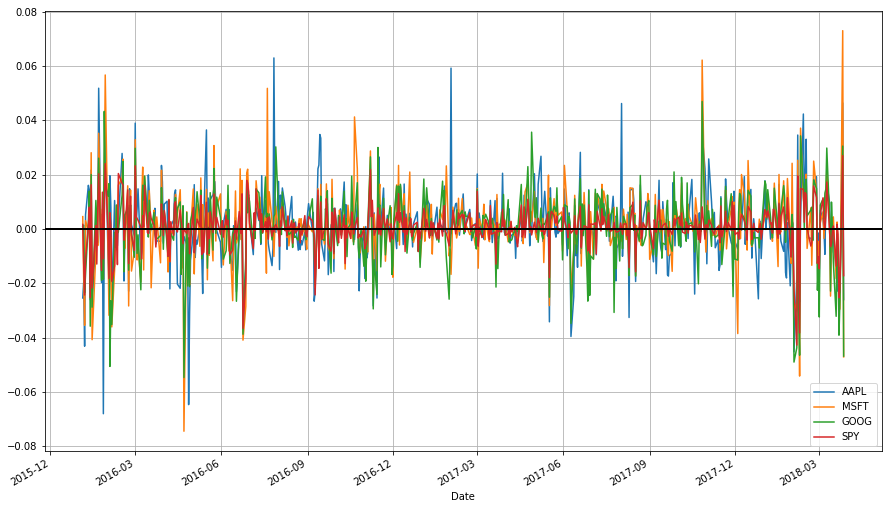

In [20]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)

 compare the performance of stocks to the performance of the overall market. SPY, which is the ticker symbol for the SPDR S&P 500 exchange-traded mutual fund (ETF) - SPY data is not available for free from Quandl, so I will get this data from Yahoo! Finance. (I don’t have a choice)

In [61]:
stockspy.head()

,AAPL,MSFT,GOOG,SPY
Date,,,,
2016-01-04,101.783763,52.181598,741.84,190.548859
2016-01-05,99.233131,52.419653,742.58,190.871170
2016-01-06,97.291172,51.467434,743.62,188.463501
2016-01-07,93.185040,49.677262,726.39,183.941971
2016-01-08,93.677776,49.829617,714.47,181.922913


# Converts to percentages to Value

In [21]:
stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages
stock_change_apr.tail()

,AAPL,MSFT,GOOG,SPY
Date,,,,
2018-03-21,-577.463148,-176.499833,-157.285338,-48.413227
2018-03-22,-359.355133,-743.873619,-984.592233,-637.935038
2018-03-23,-589.663945,-743.366326,-669.637836,-542.936617
2018-03-26,1168.762361,1839.012005,768.649993,680.184940
2018-03-27,-654.582257,-1185.615651,-1178.241231,-432.382792


# Correlation between SPY with companies

In [22]:
smcorr = stock_change_apr.drop("SPY", 1).corrwith(stock_change_apr.SPY) 
smcorr

AAPL    0.592218
MSFT    0.722941
GOOG    0.672281
dtype: float64

In [23]:
stockspy.to_csv('stocks_spyder.csv') # Save Dataframe in file CSV

------